In [8]:
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt

In [27]:
with pm.Model() as model:
    theta1 = pm.Beta("theta", 58,42)
    theta2 = pm.Normal("theta2", theta1, 0.08) # Change the variable based on the exercise
    
    dif = pm.Deterministic("t2VsT1", theta2 - theta1)
    
    trace = pm.sample(10000, step=pm.Metropolis())

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [theta2]
>Metropolis: [theta]
Sampling 2 chains: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21000/21000 [00:06<00:00, 3067.87draws/s]
The number of effective samples is smaller than 10% for some parameters.


(-0.6, 0.6)

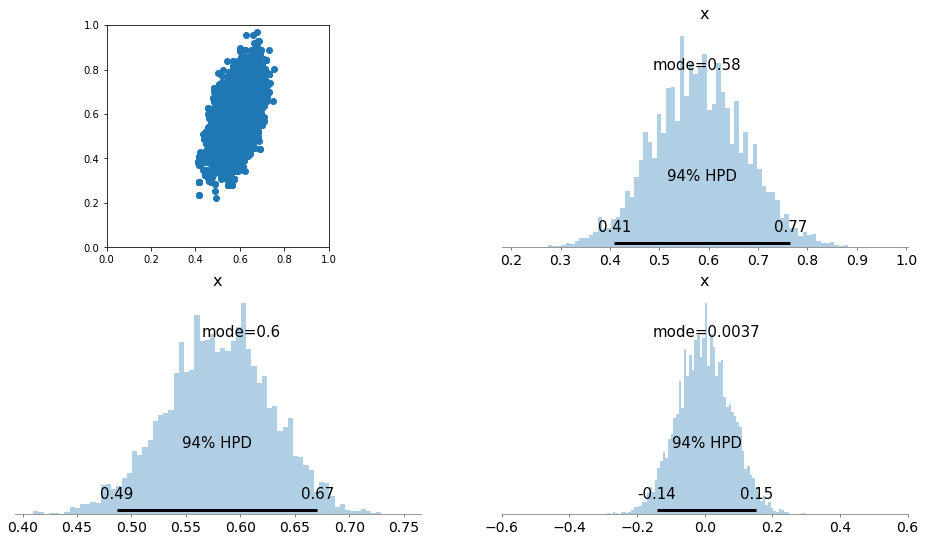

In [28]:
fig, ax = plt.subplots(2,2, figsize=(16,9))
ax[0,0].scatter(trace["theta"], trace["theta2"], marker='o')
ax[0,0].set(xlim=(0.0,1.0), ylim=(0.0,1.0), aspect='equal')

pm.plot_posterior(trace["theta"], kind="hist", ax = ax[1,0], point_estimate="mode")
pm.plot_posterior(trace["theta2"], kind="hist", ax = ax[0,1], point_estimate="mode")

pm.plot_posterior(trace["t2VsT1"], kind="hist", ax = ax[1,1], point_estimate="mode")
ax[1,1].set_xlim(-0.6,0.6)
